In [1]:
import torch
import matplotlib.pyplot as plt

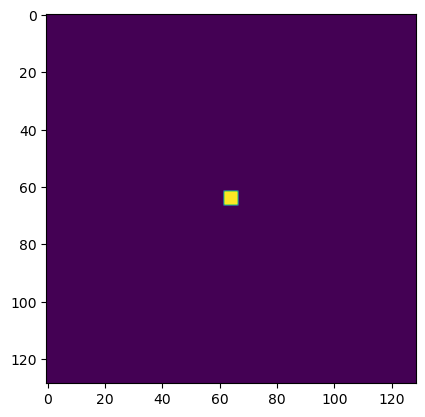

In [2]:
N = 129
k = 5

kernel = torch.zeros(N, N)
kernel[N//2 - k//2:N//2 - k//2+k, N//2 - k//2:N//2 - k//2+k] = 1

plt.imshow(kernel.numpy())

tensor([[ 2.5000e-01+0.0000e+00j,  2.0387e-01-1.3622e-01j,
          8.8388e-02-2.1339e-01j, -4.0553e-02-2.0387e-01j,
         -1.2500e-01-1.2500e-01j, -1.3622e-01-2.7097e-02j,
         -8.8388e-02+3.6612e-02j, -2.7097e-02+4.0553e-02j,
          0.0000e+00+0.0000e+00j],
        [ 2.0387e-01-1.3622e-01j,  9.2030e-02-2.2218e-01j,
         -4.4194e-02-2.2218e-01j, -1.4416e-01-1.4416e-01j,
         -1.7005e-01-3.3825e-02j, -1.2585e-01+5.2131e-02j,
         -5.2131e-02+7.8019e-02j,  1.8626e-09+4.7835e-02j,
          0.0000e+00+0.0000e+00j],
        [ 8.8388e-02-2.1339e-01j, -4.4194e-02-2.2218e-01j,
         -1.5089e-01-1.5089e-01j, -1.8835e-01-3.7466e-02j,
         -1.5089e-01+6.2500e-02j, -7.1291e-02+1.0669e-01j,
          3.7253e-09+8.8388e-02j,  2.5034e-02+3.7466e-02j,
          0.0000e+00+0.0000e+00j],
        [-4.0553e-02-2.0387e-01j, -1.4416e-01-1.4416e-01j,
         -1.8835e-01-3.7466e-02j, -1.5968e-01+6.6141e-02j,
         -8.1660e-02+1.2221e-01j,  3.7253e-09+1.1548e-01j,
          

torch.Size([16, 16])


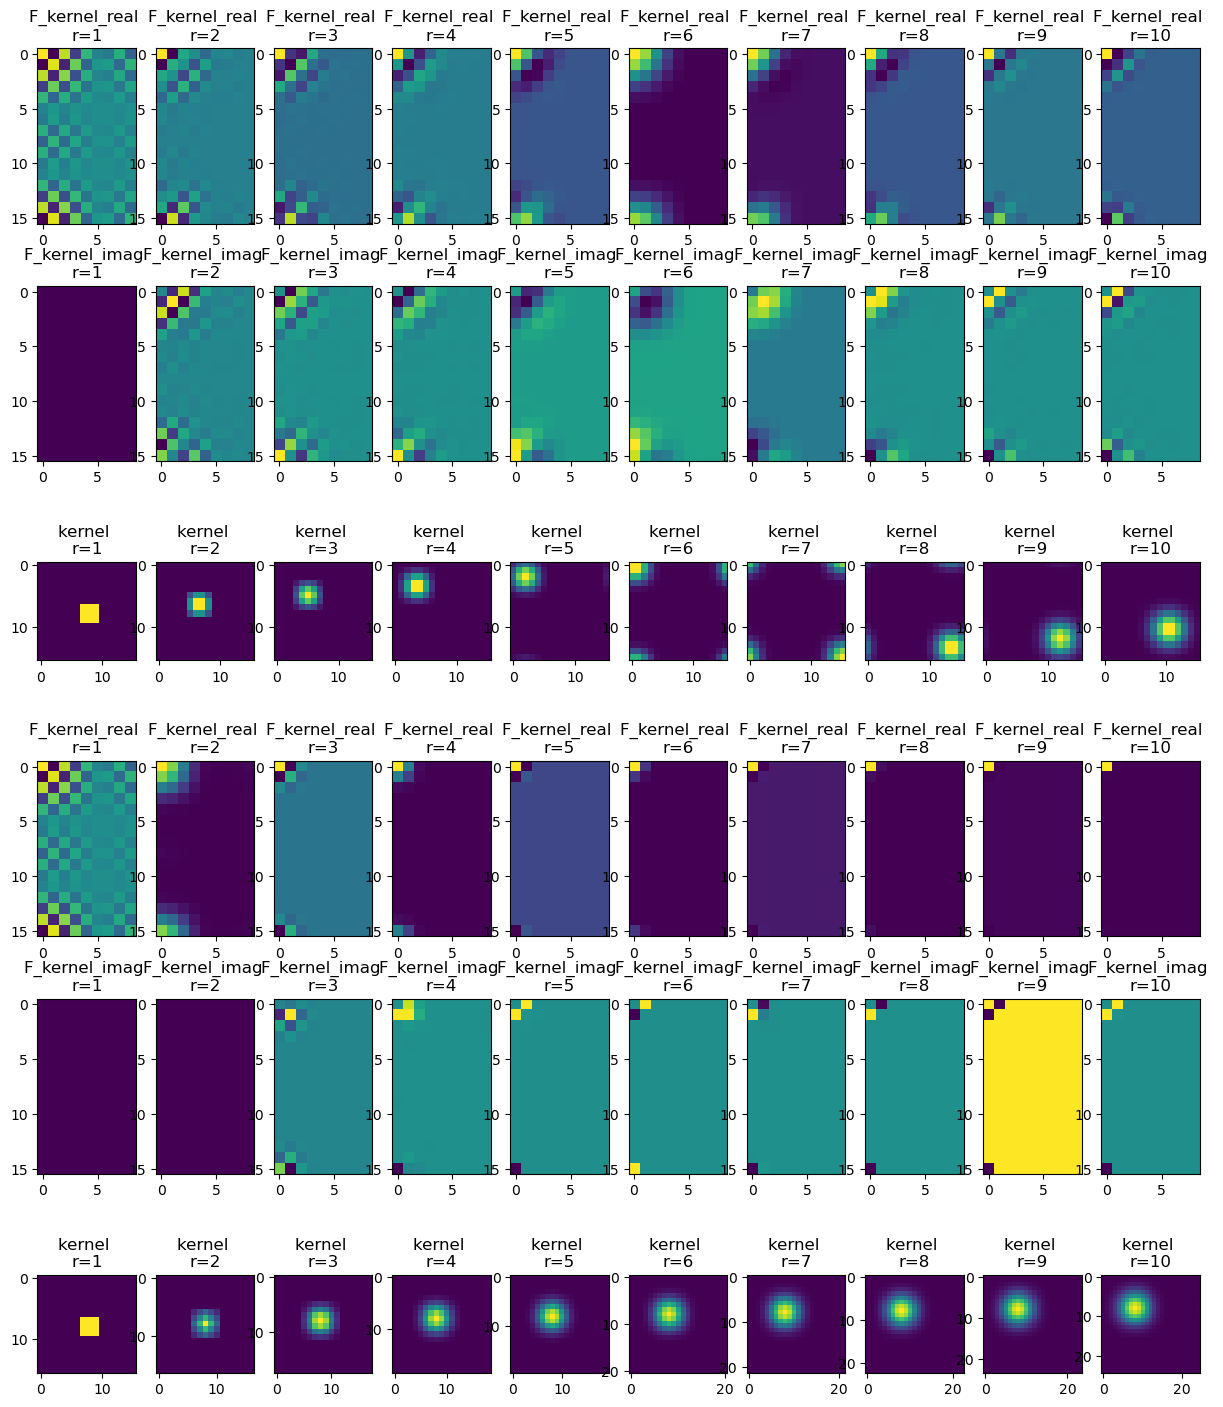

In [3]:
N = 16
k = 3
k2 = 0

init_kernel = torch.zeros(N, N)
for i in range(N):
    for j in range(N):
        if (i - N/2)**2 + (j - N/2)**2 < (k/2)**2:
            init_kernel[i, j] = 1
        if (i - N/2)**2 + (j - N/2)**2 < (k2/2)**2:
            init_kernel[i, j] = 0
kernel = torch.zeros(N, N)
for i in range(N):
    for j in range(N):
        if (i - k/2)**2 + (j - k/2)**2 < (k/2)**2:
            kernel[i, j] = 1
        if (i - k/2)**2 + (j - k/2)**2 < (k2/2)**2:
            kernel[i, j] = 0
# kernel = kernel * torch.randn(N,N).uniform_(-1,1)
# kernel[N//2 - k//2:N//2 - k//2+k, N//2 - k//2:N//2 - k//2+k] = 1
# kernel[N//2 - k2//2:N//2 - k2//2+k2, N//2 - k2//2:N//2 - k2//2+k2] = 0
f_init_kernel = torch.fft.rfft2(init_kernel, s=(N,N), norm="ortho")
f_kernel = torch.fft.rfft2(kernel, s=(N,N), norm="ortho")
print(f_kernel)
row = 6
fig, axes = plt.subplots(row, 10, figsize=(15,3*row))
for r in range(1, 11):
    f_kernel_r = f_init_kernel * f_kernel.conj() ** (r-1)
    axes[0][r-1].imshow(f_kernel_r.real.numpy())
    axes[0][r-1].set_title(f"F_kernel_real \nr={(r)}")
    axes[1][r-1].imshow(f_kernel_r.imag.numpy())
    axes[1][r-1].set_title(f"F_kernel_imag \nr={(r)}")

    kernel_r = torch.fft.irfft2(f_kernel_r, s=(N,N), norm="ortho")
    axes[2][r-1].imshow(kernel_r.numpy())
    axes[2][r-1].set_title(f"kernel \nr={(r)}")

kernel = torch.zeros(N, N)
kernel[N//2 - k//2:N//2 - k//2+k, N//2 - k//2:N//2 - k//2+k] = 1/9
kernel[N//2 - k2//2:N//2 - k2//2+k2, N//2 - k2//2:N//2 - k2//2+k2] = 0
init_kernel = kernel.clone()
print(kernel.shape)

for r in range(1, 11):
    f_kernel = torch.fft.rfft2(kernel, s=(N,N), norm="ortho")
    f_kernel_r = f_kernel * (f_kernel ** (r-1))
    kernel_r = torch.fft.irfft2(f_kernel_r, s=(N,N), norm="ortho")
    axes[3][r-1].imshow(f_kernel_r.real.numpy())
    axes[3][r-1].set_title(f"F_kernel_real \nr={(r)}")
    axes[4][r-1].imshow(f_kernel_r.imag.numpy())
    axes[4][r-1].set_title(f"F_kernel_imag \nr={(r)}")
    axes[5][r-1].imshow(kernel.numpy())
    axes[5][r-1].set_title(f"kernel \nr={(r)}")
    
    with torch.no_grad():
        conv = torch.nn.Conv2d(1, 1, kernel_size=N, bias=False, padding=N//2, padding_mode="circular")
        conv.weight.data[0,0].copy_(init_kernel)
        kernel = conv(kernel[None,None])[0,0]



In [5]:

x = torch.tensor([
    [0,0,0,0,0,0],
    [0,1,2,3,4,0],
    [0,5,6,7,8,0],
    [0,9,10,11,12,0],
    [0,13,14,15,16,0],
    [0,0,0,0,0,0]])
w = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]])
w_roll = torch.tensor([
    [5, 6, 0, 0, 0, 4],
    [8, 9, 0, 0, 0, 7],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [2, 3, 0, 0, 0, 1]])
fx = torch.fft.rfft2(x, s=(6,6), norm="ortho")
fw = torch.fft.rfft2(w_roll, s=(6,6))
y = torch.fft.irfft2(fx * fw.conj(), s=(6,6), norm="ortho")*6
y_ref =torch.nn.functional.conv2d(x[None, None, 1:-1, 1:-1], w[None,None],padding=1)
print(y[1:-1, 1:-1])
print(y_ref)

tensor([[111.0000, 178.0000, 217.0000, 145.0000],
        [231.0000, 348.0000, 393.0001, 252.0000],
        [363.0001, 528.0001, 573.0001, 360.0000],
        [197.0000, 274.0001, 295.0000, 175.0000]])
tensor([[[[111, 178, 217, 145],
          [231, 348, 393, 252],
          [363, 528, 573, 360],
          [197, 274, 295, 175]]]])
